# Plotting and Visualization

In [1]:
# Making plots an static or interactive visualizations is one of the most important tasks in data analysis. 
# it may be a part of the exploratory process; for example, helping identify outliers,
# needed data transformations, or coming up with ideas for models.
# For others, building an interactive visualization for the web may be the end goal.
# Python has many add-on libraries for making static or dynamic visualizations,
# but they generally require some additional effort on the part of the user.

# Figures and Subplots

In [2]:
# toolkit like d3.js, which excels at transforming and animating the DOM.
# Plots in matplotlib reside within a Figure object, use plt.figure to create a new figure: 
from sympy import im


import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [3]:
ax = fig.add_subplot(2, 2, 1)

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

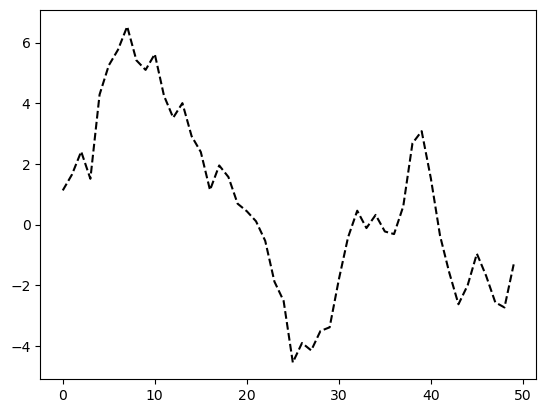

In [6]:
from numpy.random import randn 
import numpy as np
plt.plot(randn(50).cumsum(), 'k--')
plt.show()